In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#  Rutas de entrada
eigenvalues_file = "../resultados_1D/TISE/Energias.txt"
eigenfunctions_file = "../resultados_1D/TISE/funciones_onda.txt"



In [2]:
eigenfunctions_file

'../resultados_1D/TISE/funciones_onda.txt'

In [38]:
eigenvalues_file

'../resultados_1D/TISE/Energias.txt'

In [3]:
data = np.loadtxt(eigenfunctions_file, delimiter="\t", skiprows=1)


In [4]:
energias = np.loadtxt(eigenvalues_file)

/tmp/ipykernel_164880/709719498.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi_n_norm = psi_n / np.sqrt(np.trapz(psi_n**2, x, axis=0))


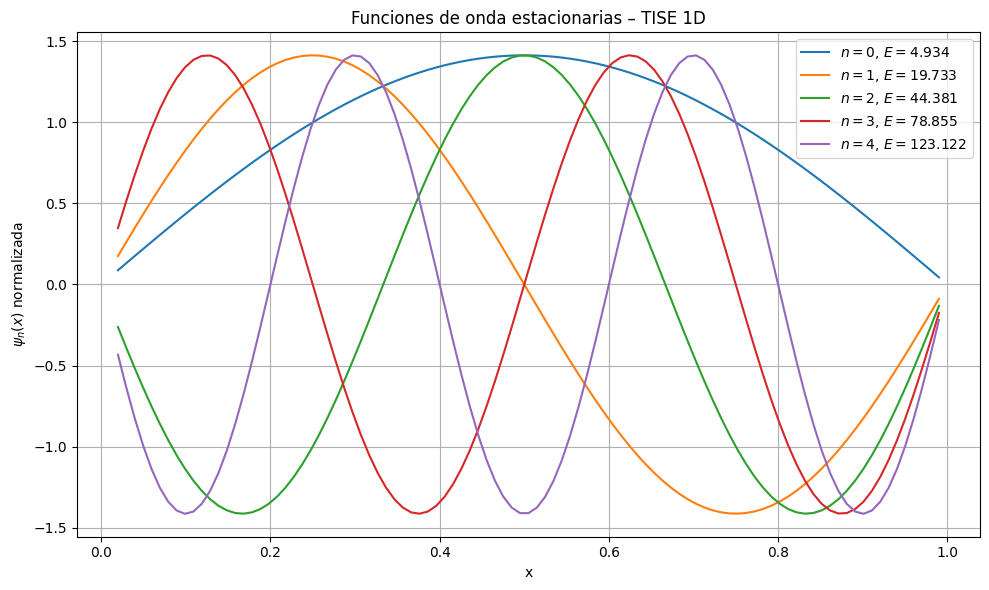

In [5]:
# Cargar datos
energias = np.loadtxt(eigenvalues_file)
data = np.loadtxt(eigenfunctions_file, delimiter="\t", skiprows=1)
x = data[:, 0]
psi_n = data[:, 1:]  # Cada columna es una función de onda

# 🔍 Normalización
psi_n_norm = psi_n / np.sqrt(np.trapz(psi_n**2, x, axis=0))

# Visualización
plt.figure(figsize=(10, 6))
for i in range(min(5, psi_n_norm.shape[1])):  # Mostrar hasta 5 estados
    plt.plot(x, psi_n_norm[:, i], label=f"$n={i}$, $E={energias[i]:.3f}$")

plt.title("Funciones de onda estacionarias – TISE 1D")
plt.xlabel("x")
plt.ylabel(r"$\psi_n(x)$ normalizada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


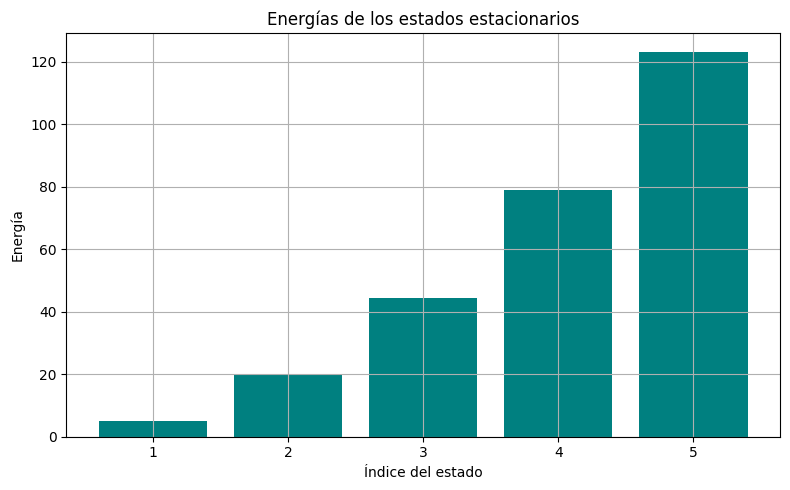

In [6]:


# Cargar energías
energias = np.loadtxt(eigenvalues_file)

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(energias)+1), energias, color='teal')
plt.xlabel('Índice del estado')
plt.ylabel('Energía')
plt.title('Energías de los estados estacionarios')
plt.grid(True)
plt.tight_layout()
plt.show()


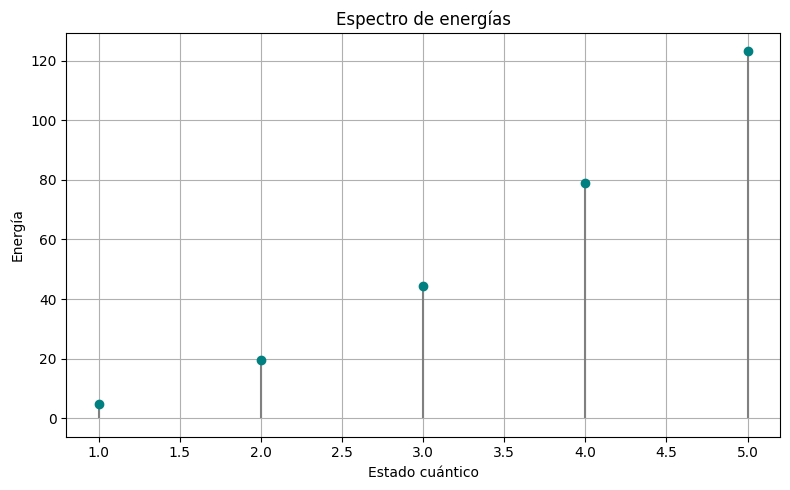

In [47]:
plt.figure(figsize=(8, 5))
markerline, stemlines, baseline = plt.stem(range(1, len(energias)+1), energias, basefmt=" ")
plt.setp(markerline, marker='o', color='teal')
plt.setp(stemlines, color='gray')
plt.xlabel('Estado cuántico')
plt.ylabel('Energía')
plt.title('Espectro de energías')
plt.grid(True)
plt.tight_layout()
plt.show()


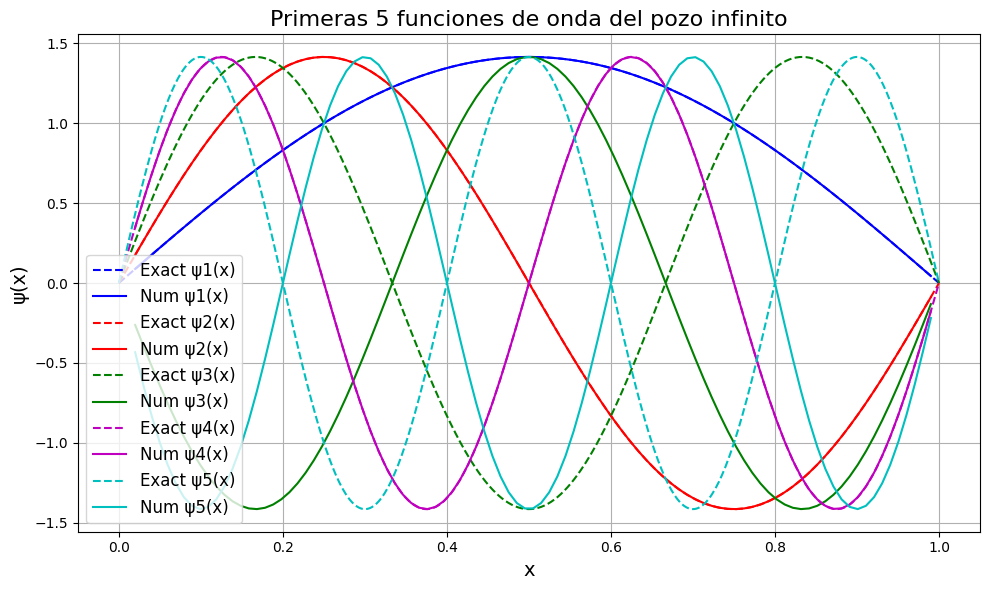

In [ ]:

outdir=data
# --- Parámetros ---
L = 1.0        # Largo del pozo
n_max = 5      # Número de funciones de onda a graficar

# --- Solución exacta ---
def psi_exact(n, x, L):
    """Función de onda exacta del pozo infinito."""
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# Leer el archivo directamente a un array
data = np.loadtxt(eigenfunctions_file, delimiter="\t", skiprows=1)

# Convertir el array en DataFrame
df = pd.DataFrame(data)

# Extraer las columnas
x_num = df.iloc[:, 0]  # primera columna
psi_num = [df.iloc[:, i+1] for i in range(n_max)]  # siguientes columnas
# --- Crear figura ---
plt.figure(figsize=(10,6))

colors = ['b', 'r', 'g', 'm', 'c']

for n in range(1, n_max+1):
    # Solución exacta
    x_exact = np.linspace(0, L, 500)
    y_exact = psi_exact(n, x_exact, L)
    plt.plot(x_exact, y_exact, color=colors[n-1], linestyle='--', label=f'Exact ψ{n}(x)')

    # Solución numérica
    plt.plot(x_num, psi_num[n-1], color=colors[n-1], linestyle='-', label=f'Num ψ{n}(x)')

plt.xlabel("x", fontsize=14)
plt.ylabel("ψ(x)", fontsize=14)
plt.title("Primeras 5 funciones de onda del pozo infinito", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

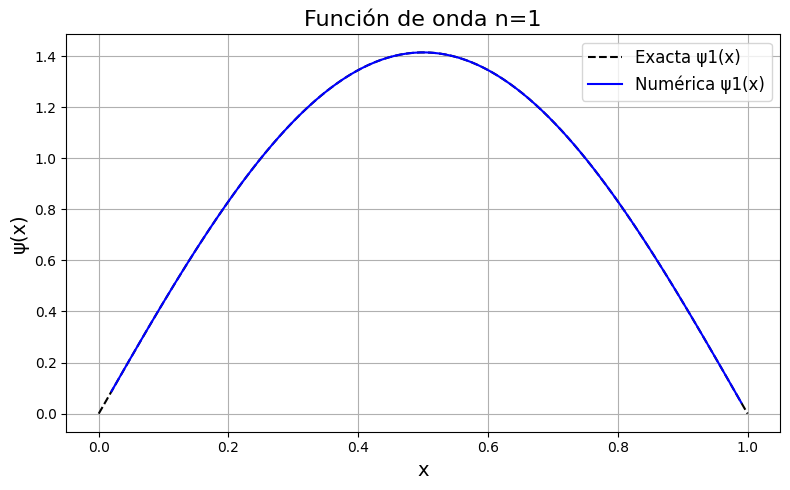

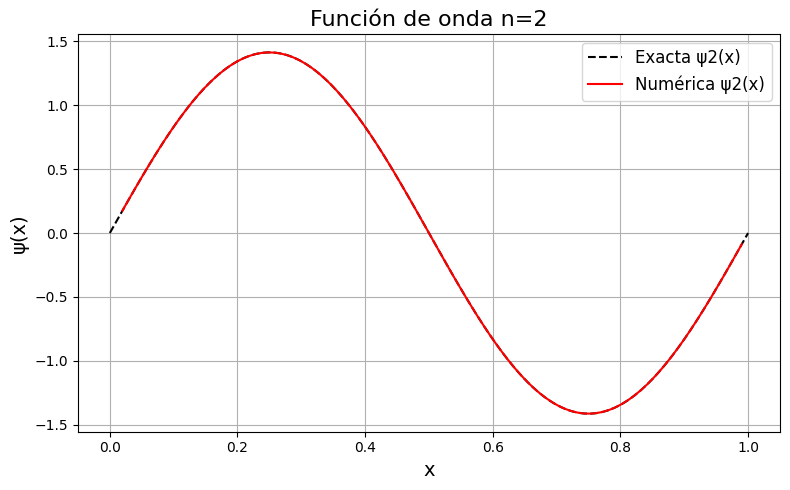

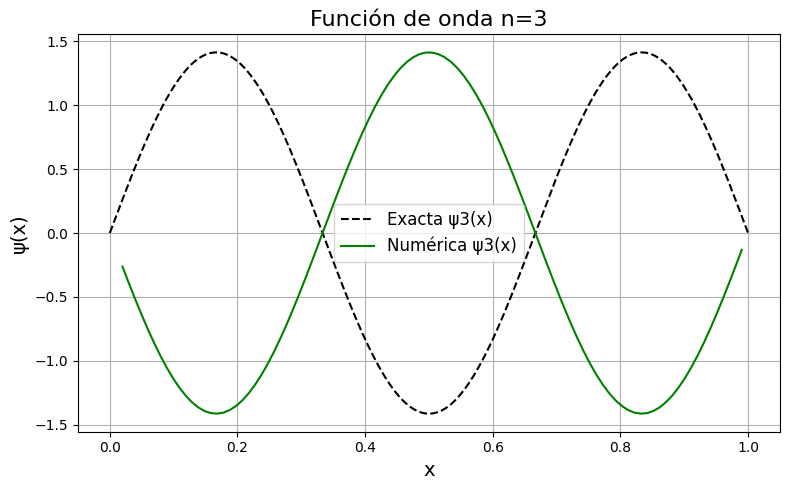

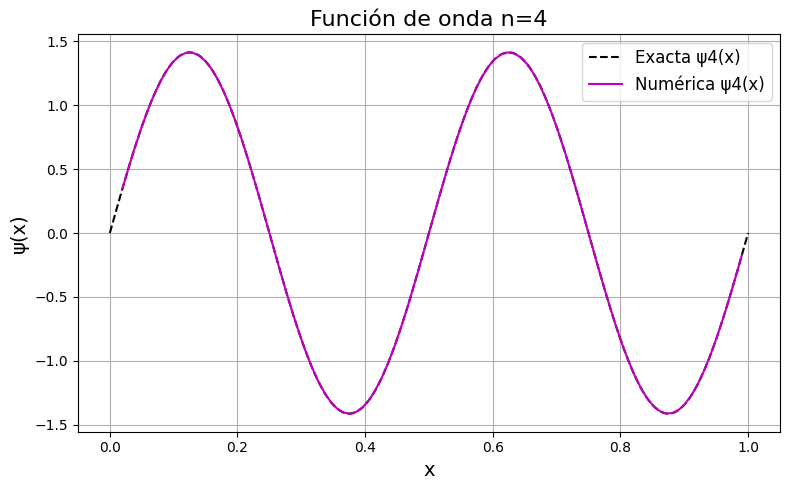

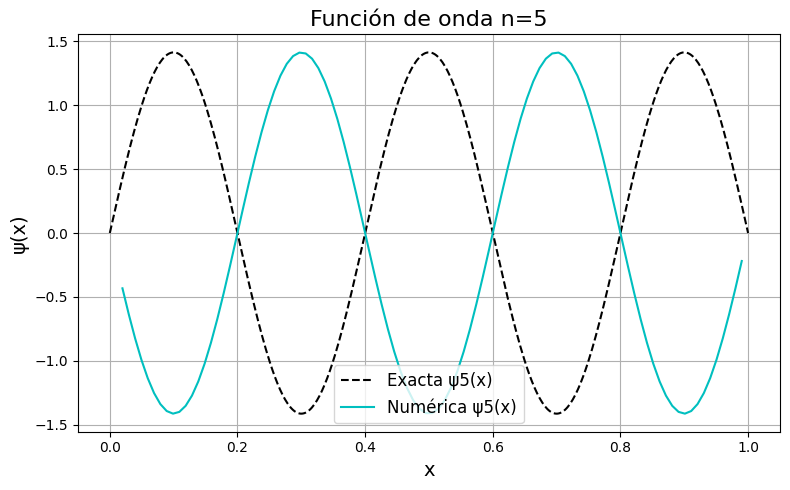

In [12]:
# --- Parámetros ---
L = 1.0        # Largo del pozo
n_max = 5      # Número de funciones de onda a graficar

# --- Solución exacta ---
def psi_exact(n, x, L):
    """Función de onda exacta del pozo infinito."""
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# --- Leer resultados numéricos 

# Convertir el array en DataFrame
df = pd.DataFrame(data)

# Extraer las columnas
x_num = df.iloc[:, 0]  # primera columna
psi_num = [df.iloc[:, i+1] for i in range(n_max)]  # siguientes columnas
# --- Crear figura ---


colors = ['b', 'r', 'g', 'm', 'c']

# --- Graficar cada función de onda por separado ---
for n in range(1, n_max+1):
    plt.figure(figsize=(8,5))
    
    # Solución exacta
    x_exact = np.linspace(0, L, 500)
    y_exact = psi_exact(n, x_exact, L)
    plt.plot(x_exact, y_exact, color='k', linestyle='--', label=f'Exacta ψ{n}(x)')
    
    # Solución numérica
    plt.plot(x_num, psi_num[n-1], color=colors[n-1], linestyle='-', label=f'Numérica ψ{n}(x)')
    
    plt.xlabel("x", fontsize=14)
    plt.ylabel("ψ(x)", fontsize=14)
    plt.title(f"Función de onda n={n}", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()